# Understanding the Socio-Political Implications of Real Estate Dynamics: A case study of Ames, Iowa

## 1. Introduction

Real estate dynamics play a pivotal role in shaping the socio-political landscape of communities, influencing everything from neighborhood vibes to civic conditions. In this case study, I delve into cityscape of Ames, Iowa, seeking to unravel the intricate interplay between real estate nuances and socio-political implications. As houses become more than just bricks and mortar, understanding how factors like neighborhood, condition, and time impact sale prices opens a window into new insights. Tis investigation aims to paint a vivid picture of the real estate tapestry that shapes Ames, providing valuable insights into the socio-political factors of this community.

## 2. The Data

So we got this dataset with info about 1460 houses in Ames, Iowa. The dependent variable of this data set is SalePrice telling us how much each hosue is worth.As we navigate through the dataset, we're presented with both quantitative and qualitative elements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('house_prices.csv') 

In [3]:
# Display the first few rows of the dataset
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### 2.1 Info about the dataset

In [4]:
# Continue with the exploration
print("\nInfo about the dataset:")
print(df.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

### 2.2 Missing Values

In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
})

# Display columns with missing values
print("\nColumns with Missing Values:")
print(missing_info[missing_info['Missing Percentage'] > 0])



Columns with Missing Values:
                    Column  Missing Percentage
LotFrontage    LotFrontage           17.739726
Alley                Alley           93.767123
MasVnrType      MasVnrType           59.726027
MasVnrArea      MasVnrArea            0.547945
BsmtQual          BsmtQual            2.534247
BsmtCond          BsmtCond            2.534247
BsmtExposure  BsmtExposure            2.602740
BsmtFinType1  BsmtFinType1            2.534247
BsmtFinType2  BsmtFinType2            2.602740
Electrical      Electrical            0.068493
FireplaceQu    FireplaceQu           47.260274
GarageType      GarageType            5.547945
GarageYrBlt    GarageYrBlt            5.547945
GarageFinish  GarageFinish            5.547945
GarageQual      GarageQual            5.547945
GarageCond      GarageCond            5.547945
PoolQC              PoolQC           99.520548
Fence                Fence           80.753425
MiscFeature    MiscFeature           96.301370


Of all the 80 columns, I will only analyse use a certain number of variables. The dependent variable is SalePrice followed by independent variables rlated to socio political traits such as Neighborhood, Condition1, Condition2, YearBuilt, YearRemodAdd, OverallQual, MSZoning, Utilities, Sale Type, aand SaleCondition. 

## 3. Posing the question

3.1. Descriptive Statistics
3.1.1 What is the distribution of home sales prices (SalePrice) in Ames, Iowa?
3.1.2 What are the general characteristics of socio-political variables such as Neighborhood, Condition1, Condition2, YearBuilt, YearRemodAdd, OverallQual, Utilities, MSZoning, SaleType, and SaleCondition in the dataset?

3.2. Hypothesis Testing
3.1.1 Is there a relationship between Neighborhood and house selling price (SalePrice)??
3.1.2 Is there a significant difference in sale prices based on different conditions (Condition1 and Condition2)?
3.1.2 Is there a significant correlation between the year a house was built (YearBuilt) and its sale price?
3.1.3 Is there a relationship between the year a house was remodeled (YearRemodAdd) and the sale price of the house sale price (SalePrice)?
3.1.4 Is there a significant correlation between house overall quality (OverallQual) and its sale price?
3.1.5 Is there a significant difference in sale prices based on different zoning classifications (MSZoning)?
3.1.6 Is there a significant difference in sale prices based on different sale types (SaleType)?
3.1.7 Is there a significant difference in sale prices based on different sale conditions (SaleCondition)?

## 4. Descriptive Statistics and Visualization

Display summary statistics for numeric columns

### 4.1. Descriptive Statistics

#### 4.1.1 What is the distribution of home sales prices (SalePrice) in Ames, Iowa?

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Display summary statistics for the SalePrice column
sale_price_stats = df['SalePrice'].describe()
print(sale_price_stats)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


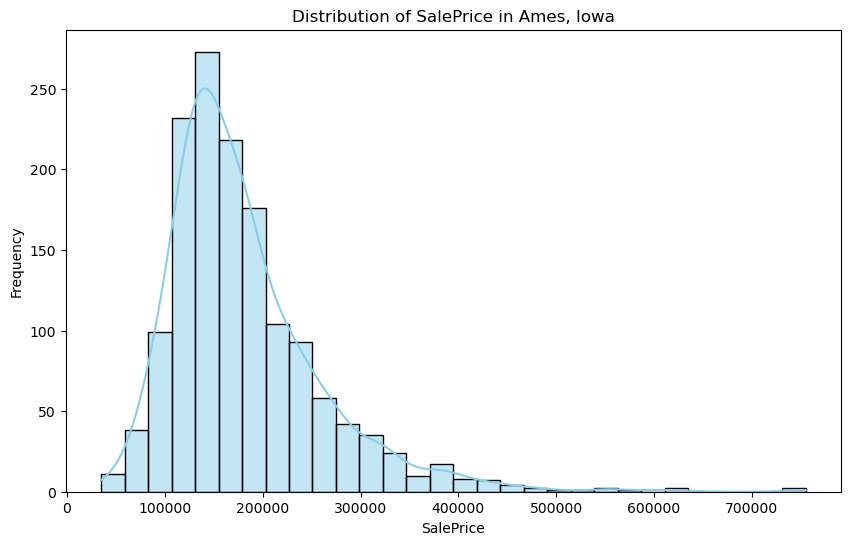

In [8]:
# Figure DIstribution of Sale Price in Ames, Iowa
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of SalePrice in Ames, Iowa')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


### 4.1.2 What are the general characteristics of socio-political variables such as Neighborhood, Condition1, Condition2, YearBuilt, YearRemodAdd, OverallQual, Utilities, MSZoning, SaleType, and SaleCondition in the dataset?

#### Statistic Description for Numeric Variables: YearBuilt, YearRemodAdd, OverallQual

In [9]:
socio_political_variables_numeric = ['YearBuilt', 'YearRemodAdd', 'OverallQual'] #input the numeric variables
socio_political_stats = df[socio_political_variables_numeric].describe(include='all')
print(socio_political_stats)


         YearBuilt  YearRemodAdd  OverallQual
count  1460.000000   1460.000000  1460.000000
mean   1971.267808   1984.865753     6.099315
std      30.202904     20.645407     1.382997
min    1872.000000   1950.000000     1.000000
25%    1954.000000   1967.000000     5.000000
50%    1973.000000   1994.000000     6.000000
75%    2000.000000   2004.000000     7.000000
max    2010.000000   2010.000000    10.000000


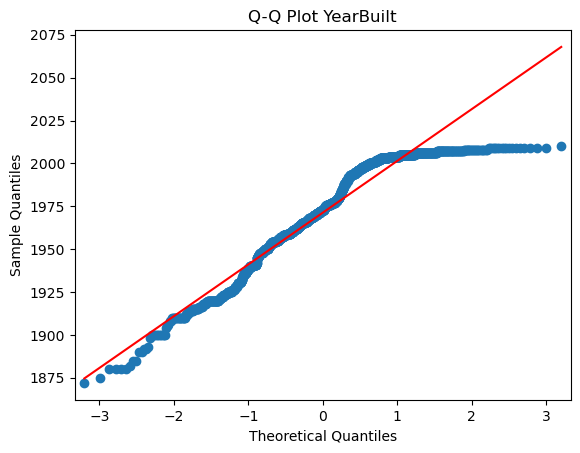

Statistik Shapiro-Wilk: 0.9255961775779724, p-value: 2.7690108619978015e-26


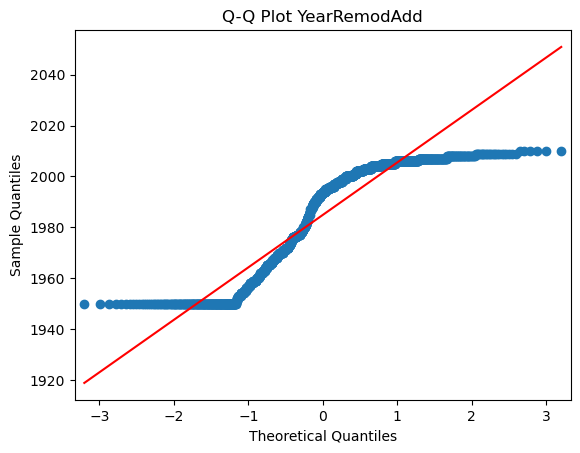

Statistik Shapiro-Wilk: 0.8627967834472656, p-value: 6.714697860852938e-34


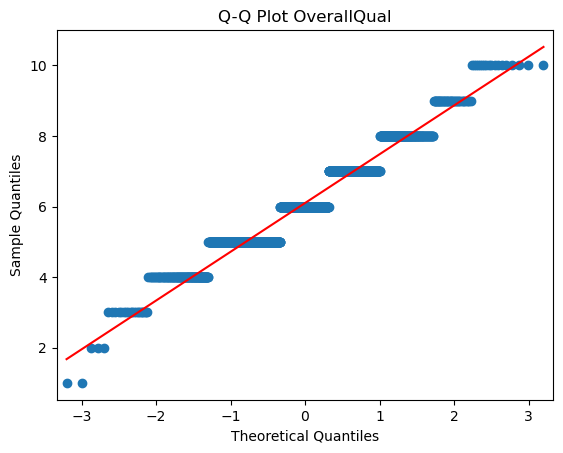

Statistik Shapiro-Wilk: 0.9480094909667969, p-value: 2.688552318270029e-22


In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro

# Function to create Q-Q Plot and Normality Test (uji normalitas)
def plot_and_test_normality(data, title):
    # Q-Q Plot
    sm.qqplot(data, line='s')
    plt.title(f'Q-Q Plot {title}')
    plt.show()

    # Uji normalitas Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(data)
    print(f'Statistik Shapiro-Wilk: {stat_shapiro}, p-value: {p_shapiro}')

# Call the function of each continuous variables (Panggil fungsi untuk masing-masing variabel)
plot_and_test_normality(df['YearBuilt'], 'YearBuilt')
plot_and_test_normality(df['YearRemodAdd'], 'YearRemodAdd')
plot_and_test_normality(df['OverallQual'], 'OverallQual')



Overall the normality test of these three variables show the variables are not normally distributed.

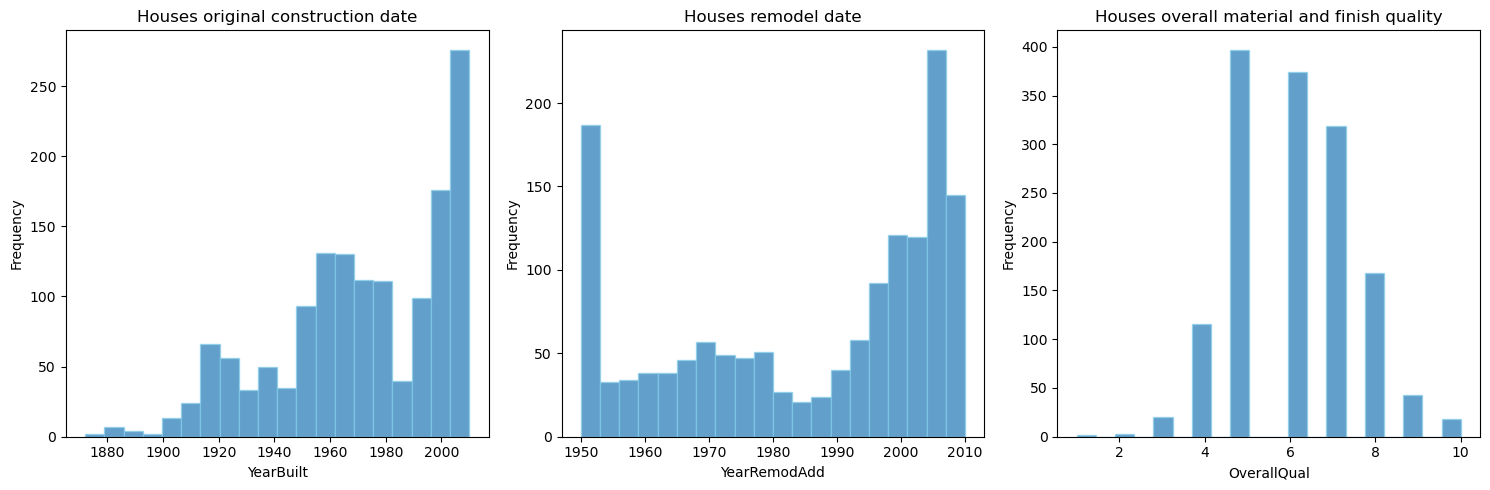

In [12]:
import matplotlib.pyplot as plt

# Variabel sosial-politik
socio_political_variables_numeric = ['YearBuilt', 'YearRemodAdd', 'OverallQual']
histogram_titles = ['Houses original construction date', 'Houses remodel date', 'Houses overall material and finish quality']

# Membuat subplot untuk setiap variabel
fig, axes = plt.subplots(nrows=1, ncols=len(socio_political_variables_numeric), figsize=(15, 5))

# Memplot histogram untuk setiap variabel
for i, var in enumerate(socio_political_variables_numeric):
    axes[i].hist(df[var].dropna(), bins=20, edgecolor='skyblue', alpha=0.7)
    axes[i].set_title(histogram_titles[i])  # Mengatur judul sesuai dengan daftar judul yang telah ditentukan
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


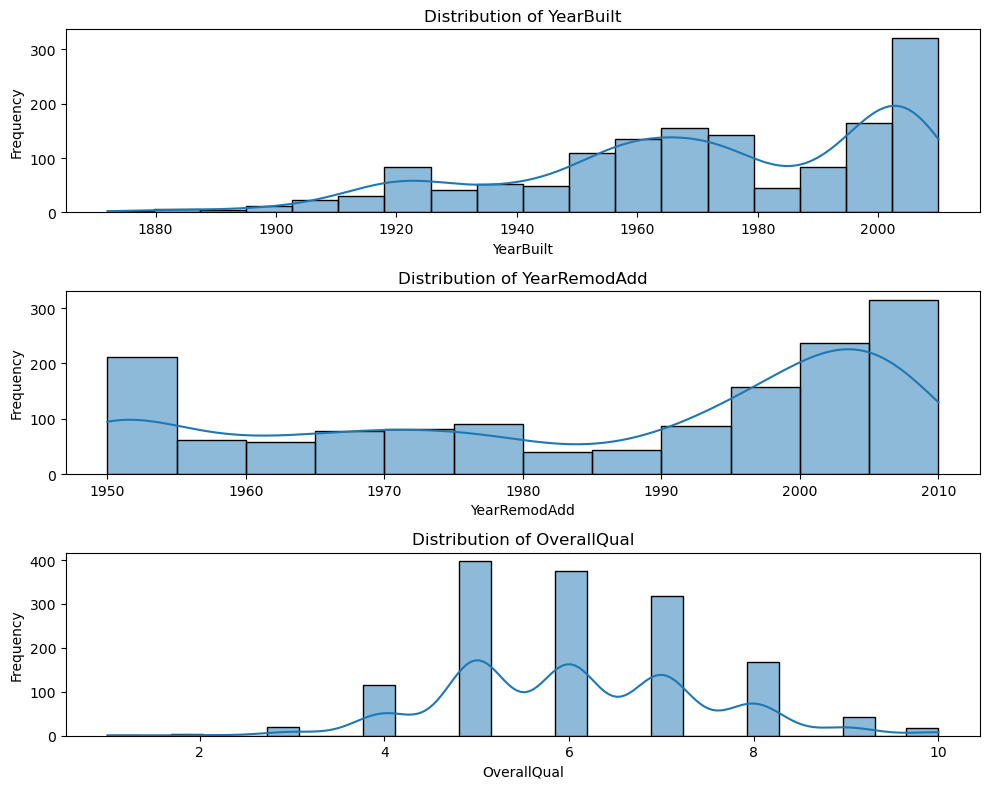

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of socio-political variables
socio_political_variables_numeric = ['YearBuilt', 'YearRemodAdd', 'OverallQual']

# Create subplots
fig, axes = plt.subplots(nrows=len(socio_political_variables_numeric), figsize=(10, 8))

# Iterate through each variable and plot histogram
for i, variable in enumerate(socio_political_variables_numeric):
    sns.histplot(data=df, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#### The general characteristics of socio-political variables (categorical variables)

In [13]:
categorical_variables = ['Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'MSZoning', 'SaleType', 'SaleCondition']

for variable in categorical_variables:
    print(f"Descriptive statistics for {variable}:")
    print(df[variable].value_counts())
    print("\n")


Descriptive statistics for Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


Descriptive statistics for Condition1:
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


Descriptive statistics for Condition2:
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64


Descriptive statistics for Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Descriptive statistics for

In [15]:
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your Seaborn plotting code here


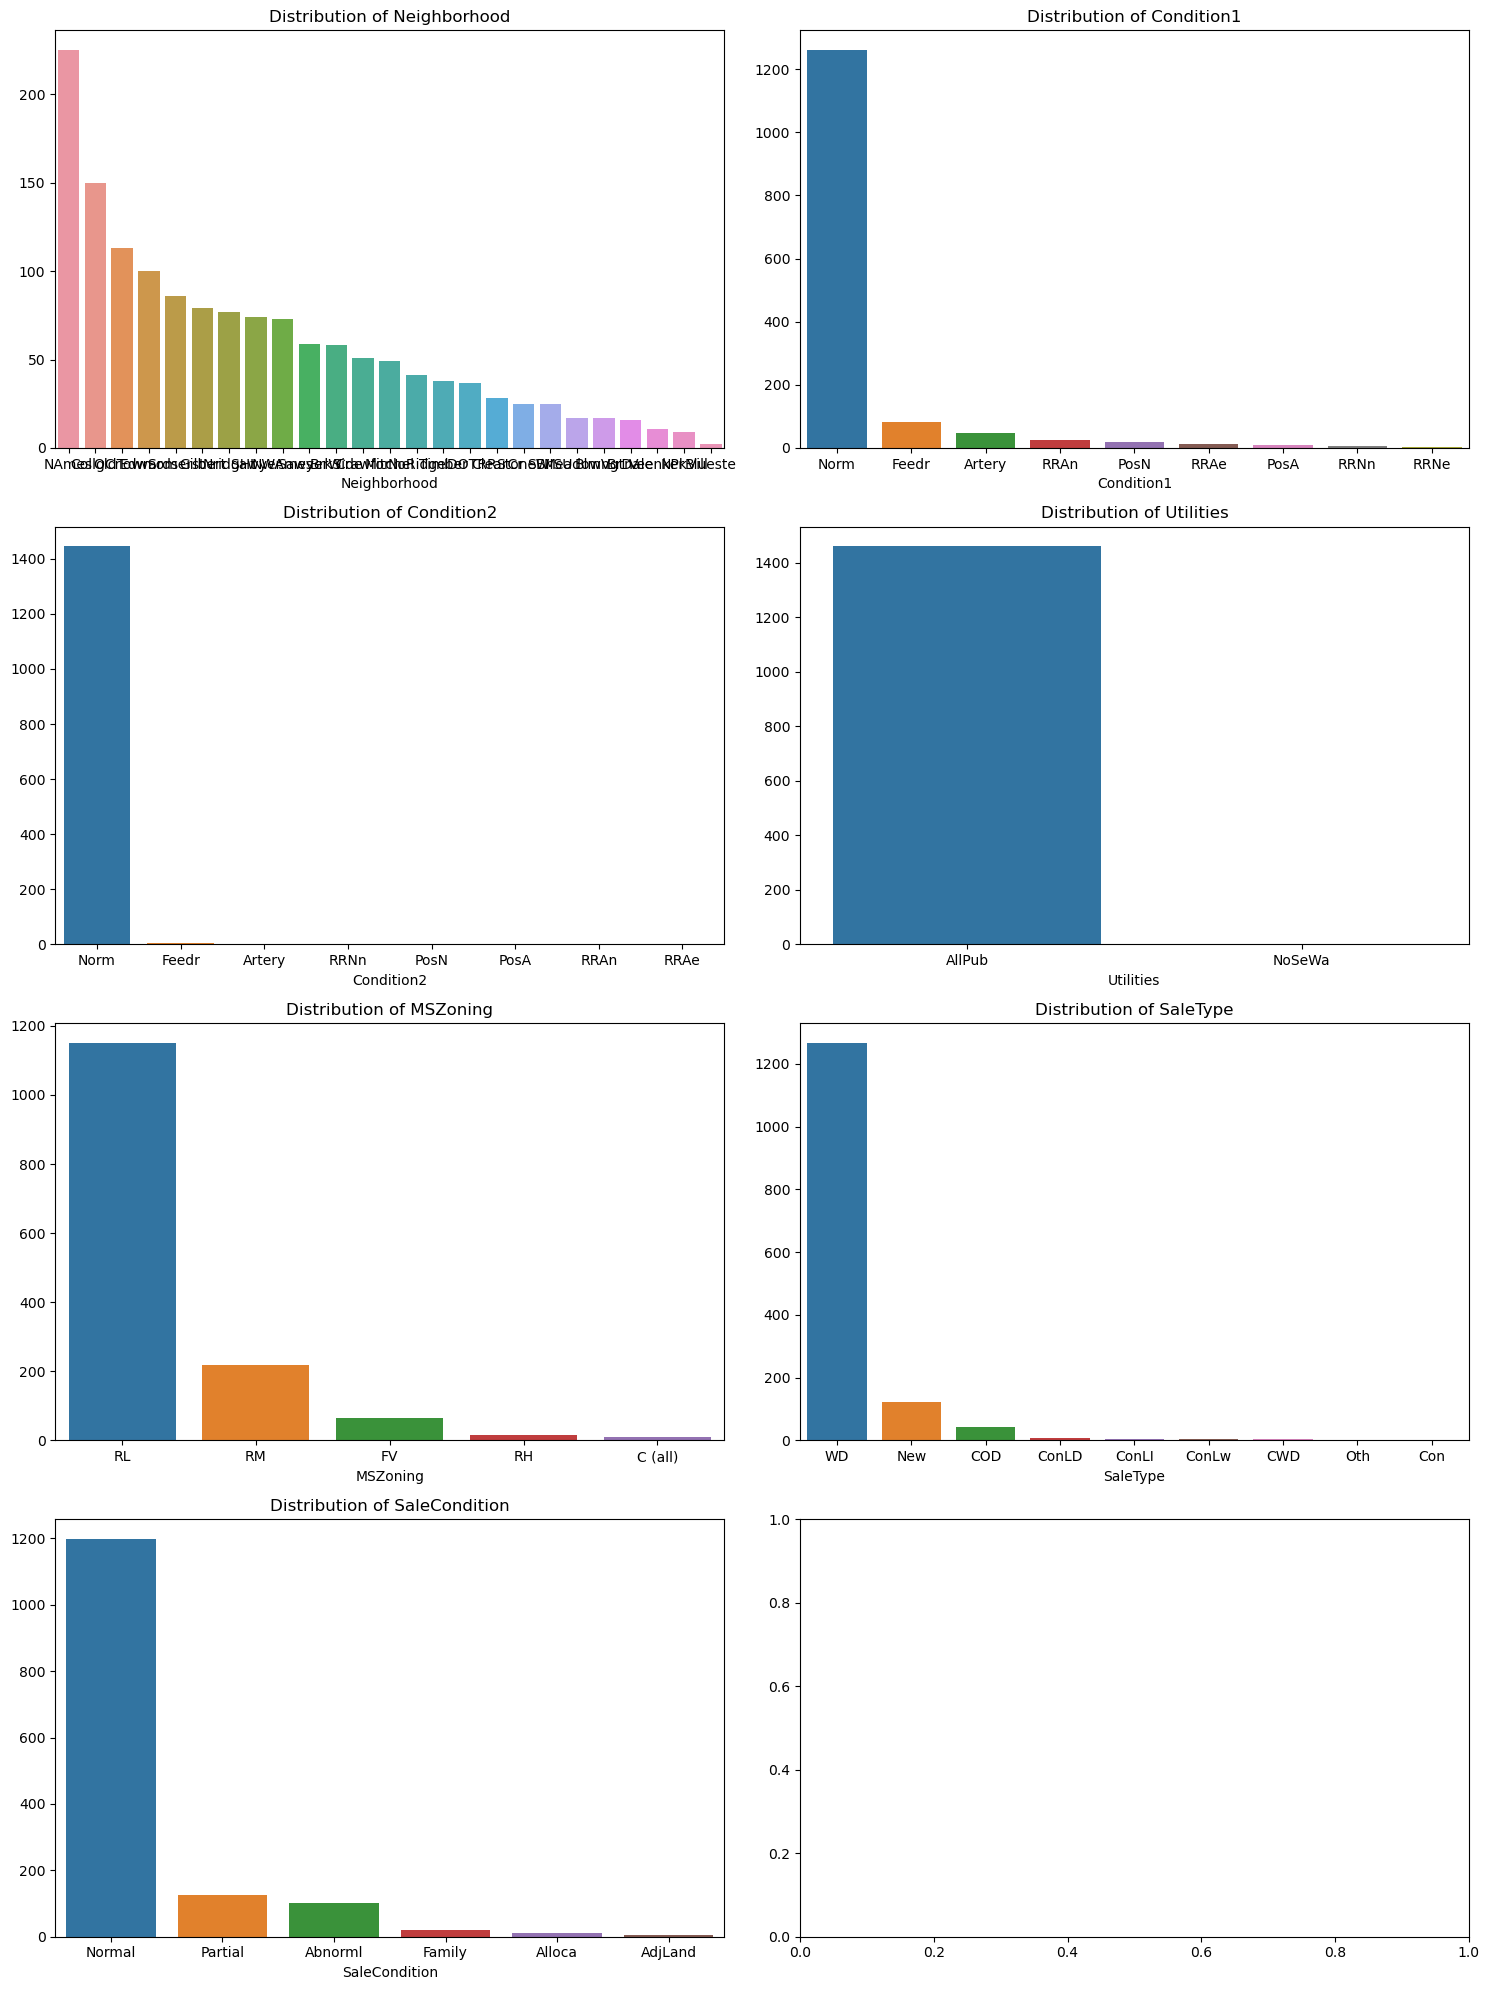

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots dengan satu kolom
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Variabel kategorikal
categorical_variables = ['Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'MSZoning', 'SaleType', 'SaleCondition']

# Iterasi untuk setiap variabel
for i, variable in enumerate(categorical_variables):
    # Hitung frekuensi nilai unik dan plot
    counts = df[variable].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i // 2, i % 2])
    
    # Beri judul pada setiap subplot
    axes[i // 2, i % 2].set_title(f'Distribution of {variable}')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()


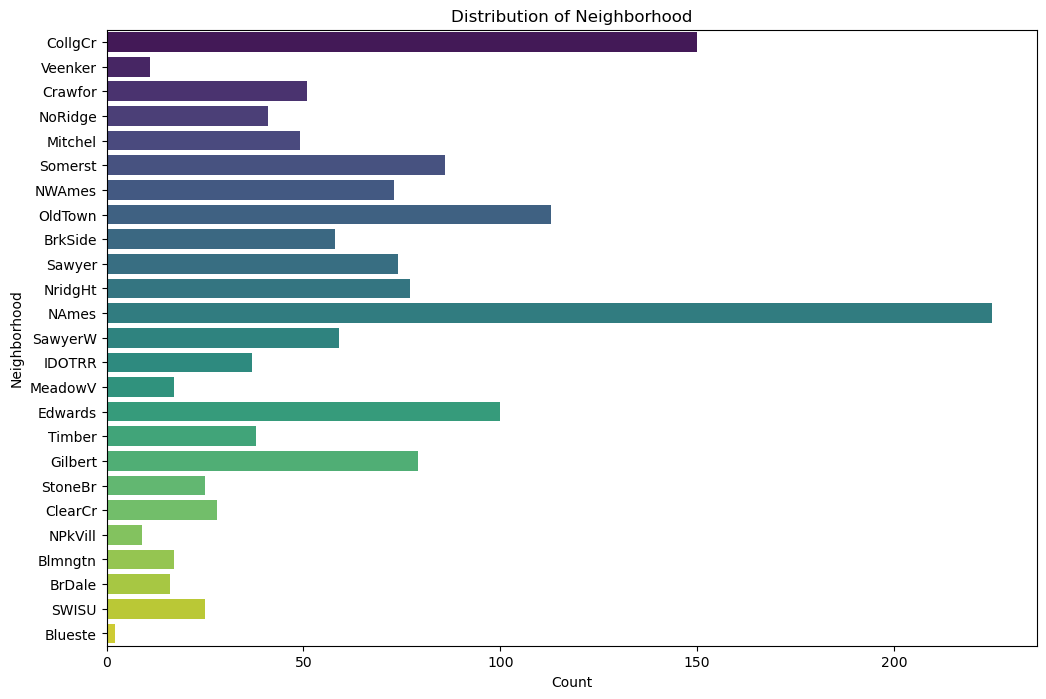

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot the horizontal bar chart
sns.countplot(data=df, y='Neighborhood', palette='viridis')

# Set title and labels
plt.title('Distribution of Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')

# Show the plot
plt.show()


#### Add the count numbers of each categories

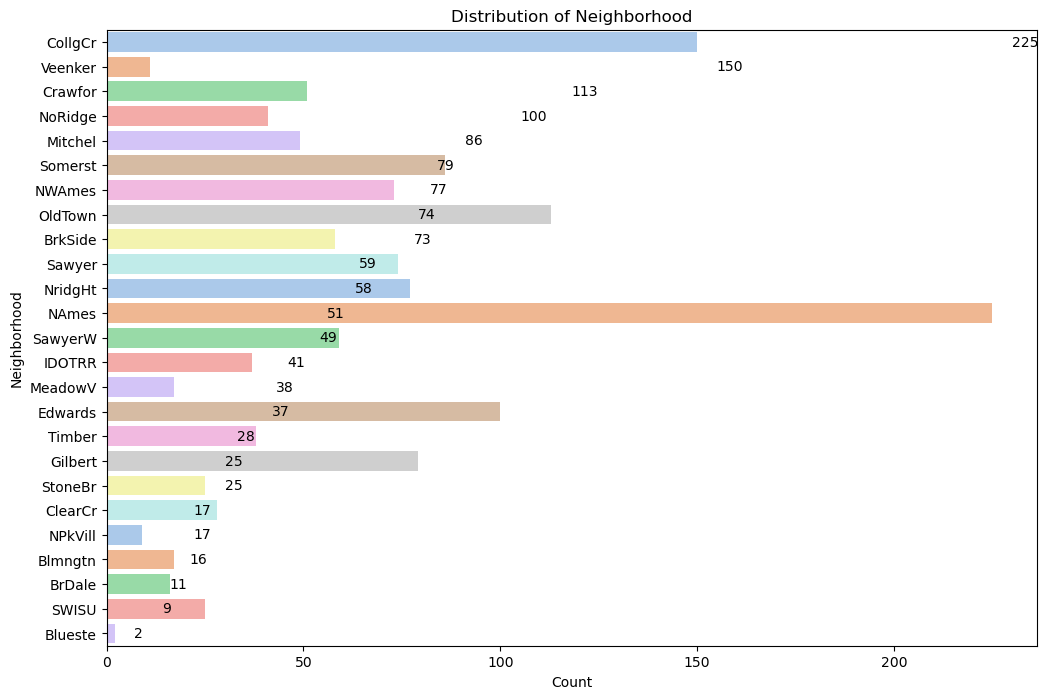

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot the horizontal bar chart
sns.countplot(data=df, y='Neighborhood', palette='pastel')

# Set title and labels
plt.title('Distribution of Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')


# Menampilkan panjang kategori 
neighborhood_counts = df['Neighborhood'].value_counts()
for i, count in enumerate(neighborhood_counts):
    plt.text(count + 5, i, f'{count}', va='center')

# Show the plot
plt.show()


### 4.2 Hypothesis Testing

The Ames, Iowa real estate dynamics case study aims to see the socio-political implications on house prices. In order to draw meaningful conclusions, I conduct hypothesis testing, involving statistical inferences about a population based on the provided dataset. Here I pose hypotheses related to various socio-political factors and thei impact on housing prices. For each hypothesis, specific statistical tests will be employed. These may include Analysis of Variance (ANOVA), Correlation Analysis (e.g., Pearson correlation coefficient), and other relevant tests based on the nature of the variables involved.

#### 4.1.1 Is there a relationship between Neighborhood and house selling price (SalePrice)?

We hypothesize that different neighborhoods may have a significant impact on home prices in Ames, Iowa. Our null hypothesis (H0) assumes no significant difference, while the alternative hypothesis (H1) suggests a significant difference in housing prices across neighborhoods.

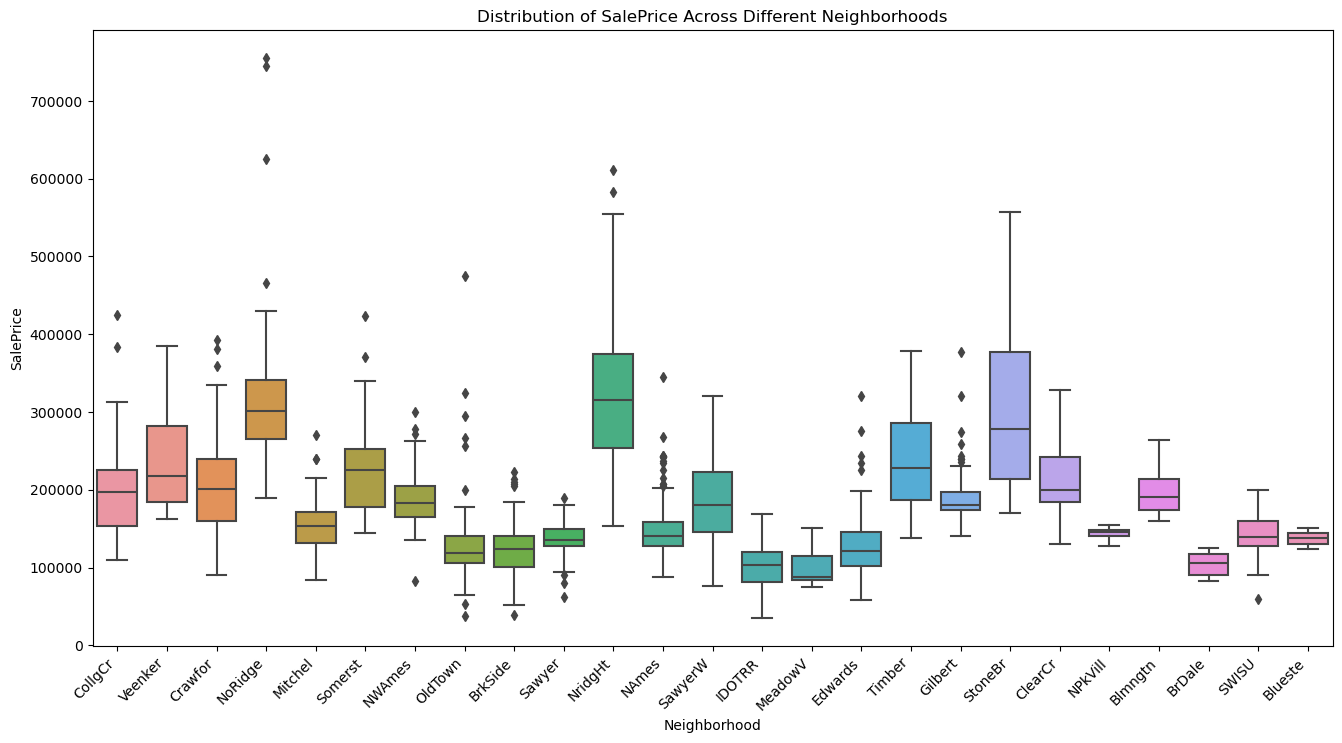

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(16, 8))

# Plot a boxplot to visualize the distribution of SalePrice across different Neighborhoods
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Distribution of SalePrice Across Different Neighborhoods')
plt.show()


In [25]:
from scipy.stats import f_oneway

# Extract data for each neighborhood
neighborhoods = df['Neighborhood'].unique()
neighborhood_data = [df[df['Neighborhood'] == neighborhood]['SalePrice'] for neighborhood in neighborhoods]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*neighborhood_data)

# Print the results
print(f'ANOVA F-Statistic: {f_statistic}')
print(f'ANOVA P-Value: {p_value}')

# Check if the p-value is below the significance level (e.g., 0.05) to reject the null hypothesis
if p_value < 0.05:
    print('There is a significant relationship between Neighborhood and SalePrice.')
else:
    print('There is no significant relationship between Neighborhood and SalePrice.')


ANOVA F-Statistic: 71.78486512058272
ANOVA P-Value: 1.558600282771154e-225
There is a significant relationship between Neighborhood and SalePrice.


#### 4.1.2 Is there a significant difference in sale prices based on different conditions (Condition1 and Condition2)?

Similarly, we explore the impact of different conditions, both primary (Condition1) and secondary (Condition2), on home prices. Our hypotheses posit potential significant differences in sale prices based on these conditions.

#### The Statistics

In [26]:
from scipy.stats import f_oneway

# Extract data for each condition
conditions1 = df['Condition1'].unique()
conditions2 = df['Condition2'].unique()

# Combine unique conditions from both Condition1 and Condition2
all_conditions = set(conditions1) | set(conditions2)

# Extract sale prices for each condition
condition_data = [df[(df['Condition1'] == condition) | (df['Condition2'] == condition)]['SalePrice'] for condition in all_conditions]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*condition_data)

# Print the results
print(f'ANOVA F-Statistic: {f_statistic}')
print(f'ANOVA P-Value: {p_value}')

# Check if the p-value is below the significance level (e.g., 0.05) to reject the null hypothesis
if p_value < 0.05:
    print('There is a significant difference in sale prices based on different conditions.')
else:
    print('There is no significant difference in sale prices based on different conditions.')


ANOVA F-Statistic: 6.131501248102555
ANOVA P-Value: 8.199604098187709e-08
There is a significant difference in sale prices based on different conditions.


#### The VIsualization

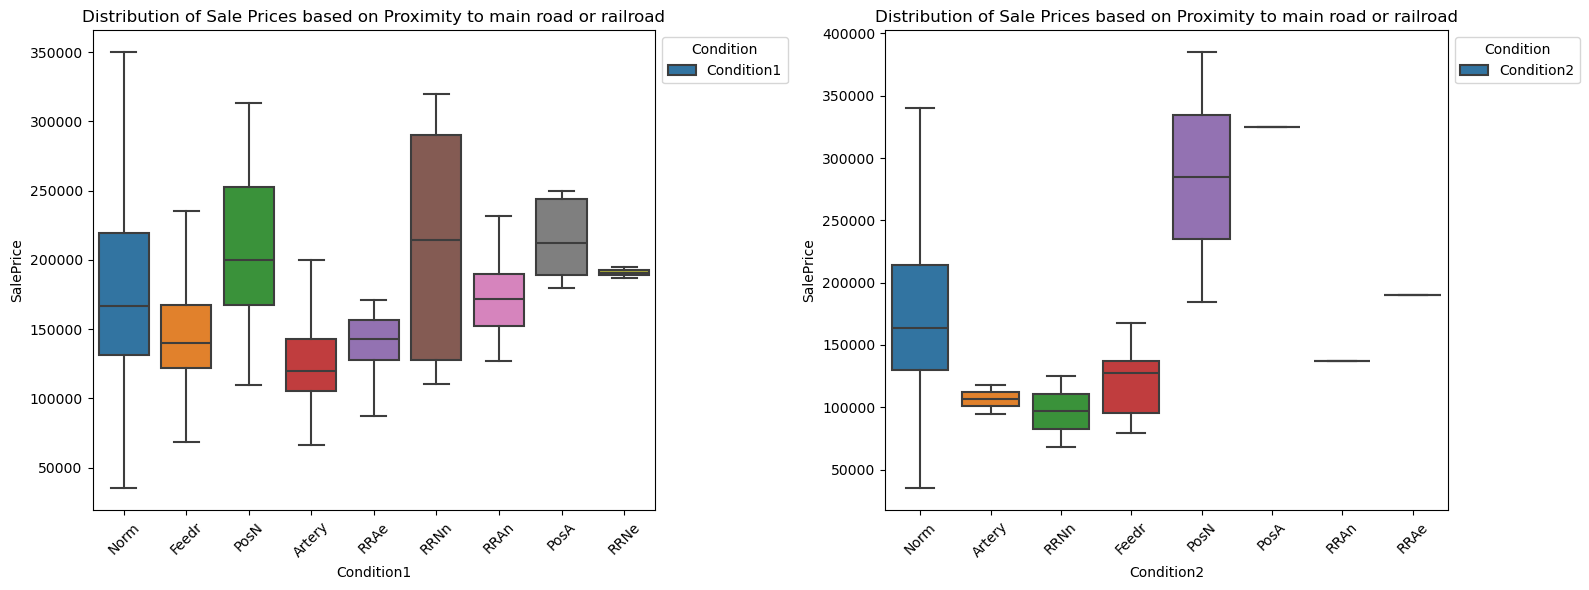

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot individual boxplots for Condition1 and Condition2
sns.boxplot(data=df, x='Condition1', y='SalePrice', ax=axes[0], showfliers=False)
sns.boxplot(data=df, x='Condition2', y='SalePrice', ax=axes[1], showfliers=False)

# Set plot titles
axes[0].set_title('Distribution of Sale Prices based on Proximity to main road or railroad')
axes[1].set_title('Distribution of Sale Prices based on Proximity to main road or railroad')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Display legends outside the subplots
axes[0].legend(labels=['Condition1'], title='Condition', loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(labels=['Condition2'], title='Condition', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


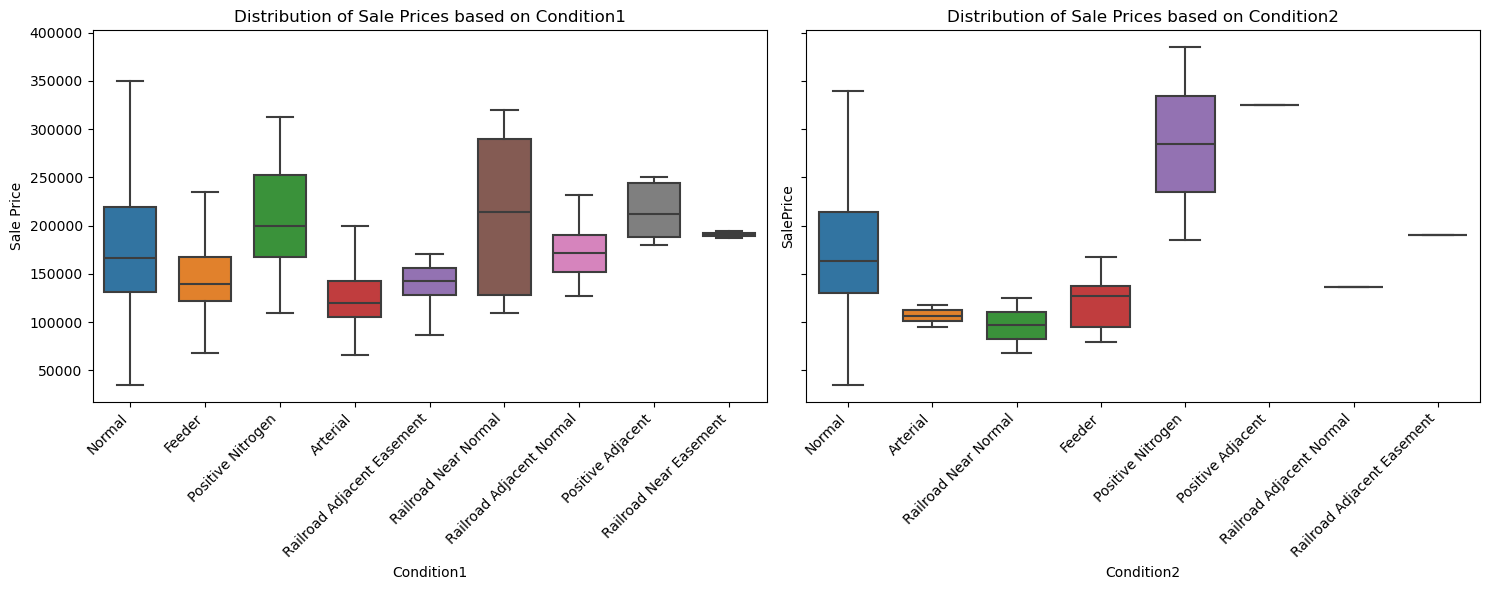

In [34]:
## Add full names on each abbreviation

import matplotlib.pyplot as plt
import seaborn as sns


# Mapping dictionary for Condition1
condition1_mapping = {
    'Norm': 'Normal',
    'Feedr': 'Feeder',
    'Artery': 'Arterial',
    'RRAn': 'Railroad Adjacent Normal',
    'PosN': 'Positive Nitrogen',
    'RRAe': 'Railroad Adjacent Easement',
    'PosA': 'Positive Adjacent',
    'RRNn': 'Railroad Near Normal',
    'RRNe': 'Railroad Near Easement'
}

# Mapping dictionary for Condition2
condition2_mapping = {
    'Norm': 'Normal',
    'Feedr': 'Feeder',
    'Artery': 'Arterial',
    'RRNn': 'Railroad Near Normal',
    'PosN': 'Positive Nitrogen',
    'RRAe': 'Railroad Adjacent Easement',
    'PosA': 'Positive Adjacent',
    'RRAn': 'Railroad Adjacent Normal'
}

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

# Plot boxplots with mapped labels for Condition1
sns.boxplot(data=df.replace({'Condition1': condition1_mapping}),
            x='Condition1', y='SalePrice', ax=axes[0], showfliers=False, width=0.7)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('Distribution of Sale Prices based on Condition1')
axes[0].set_xlabel('Condition1')
axes[0].set_ylabel('Sale Price')

# Plot boxplots with mapped labels for Condition2
sns.boxplot(data=df.replace({'Condition2': condition2_mapping}),
            x='Condition2', y='SalePrice', ax=axes[1], showfliers=False, width=0.7)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_title('Distribution of Sale Prices based on Condition2')
axes[1].set_xlabel('Condition2')

# Adjust layout
plt.tight_layout()
plt.show()


#### 4.1.3 Is there a significant correlation between the year a house was built (YearBuilt) and its sale price?

We investigate whether the year a house was built (YearBuilt) has a correlation with its sale price. Our null hypothesis assumes no significant correlation, while the alternative hypothesis suggests a significant relationship.

In [35]:
import scipy.stats as stats

# Extract variables
year_built = df['YearBuilt']
sale_price = df['SalePrice']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(year_built, sale_price)

# Display results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Perform hypothesis test
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")


Pearson Correlation Coefficient: 0.5228973328794968
P-value: 2.9902290990137165e-103
Reject the null hypothesis: There is a significant correlation.


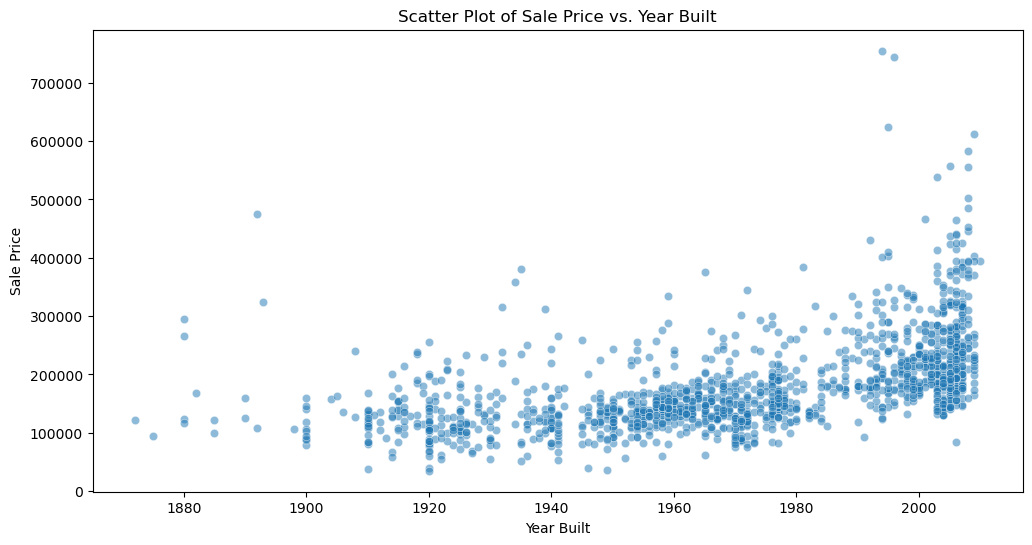

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', alpha=0.5)

# Set plot title and labels
plt.title('Scatter Plot of Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

# Show the plot
plt.show()


#### 4.1.4 Is there a relationship between the year a house was remodeled (YearRemodAdd) and the sale price of the house sale price (SalePrice)?

The study also examines the correlation between the year of remodeling (YearRemodAdd) and sale prices. We propose hypotheses to determine whether remodeling has a discernible impact on home values.

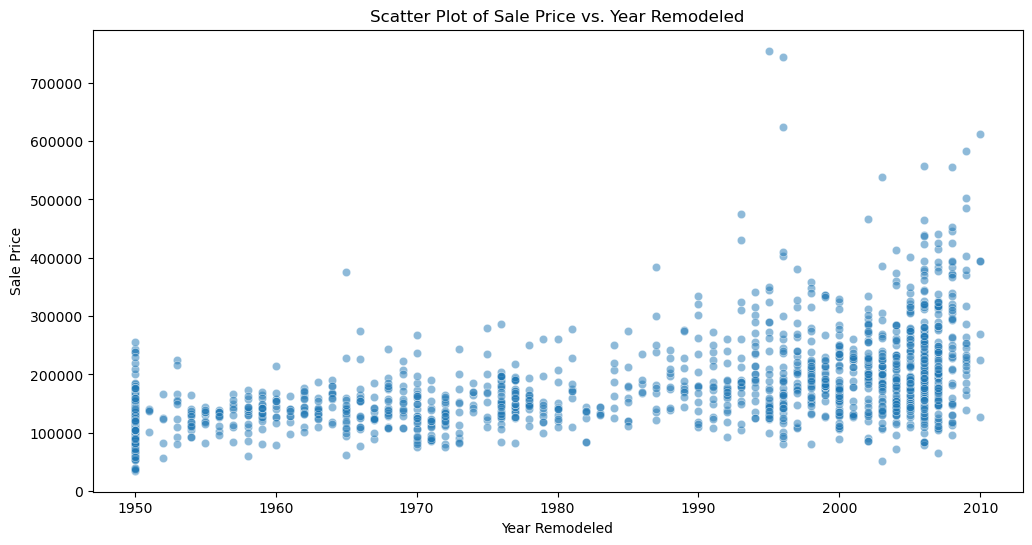

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(data=df, x='YearRemodAdd', y='SalePrice', alpha=0.5)

# Set plot title and labels
plt.title('Scatter Plot of Sale Price vs. Year Remodeled')
plt.xlabel('Year Remodeled')
plt.ylabel('Sale Price')

# Show the plot
plt.show()


In [38]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['YearRemodAdd'], df['SalePrice'])

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check for statistical significance
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")


Pearson Correlation Coefficient: 0.5071009671113862
P-value: 3.1649482419179543e-96
Reject the null hypothesis: There is a significant correlation.


In [39]:
from scipy.stats import spearmanr

# Assuming df
correlation, p_value = spearmanr(df['YearRemodAdd'], df['SalePrice'])

print(f"Spearman's correlation: {correlation}")
print(f"P-value: {p_value}")


Spearman's correlation: 0.5711589780582343
P-value: 3.557233443898463e-127


The Spearman's correlation coefficient between the year of remodeling (YearRemodAdd) and sale prices (SalePrice) is approximately 0.571, indicating a moderate positive monotonic relationship. The p-value, which is very close to zero (3.56e-127), suggests that this correlation is statistically significant. Therefore, there is evidence to reject the null hypothesis that there is no correlation between the year of remodeling and sale prices.

In simpler terms, it appears that there is a discernible relationship between the year a house was remodeled and its sale price in the dataset. The positive correlation suggests that, on average, houses with more recent remodel years tend to have higher sale prices. Keep in mind that correlation does not imply causation, and other factors may contribute to this observed relationship.

#### 4.1.5 Is there a significant correlation between house overall quality (OverallQual) and its sale price?

The overall quality of a house (OverallQual) is another factor under scrutiny. Hypotheses are formulated to ascertain whether higher quality leads to higher sale prices.

Pearson Correlation Coefficient: 0.7909816005838048
P-value: 2.185675268e-313


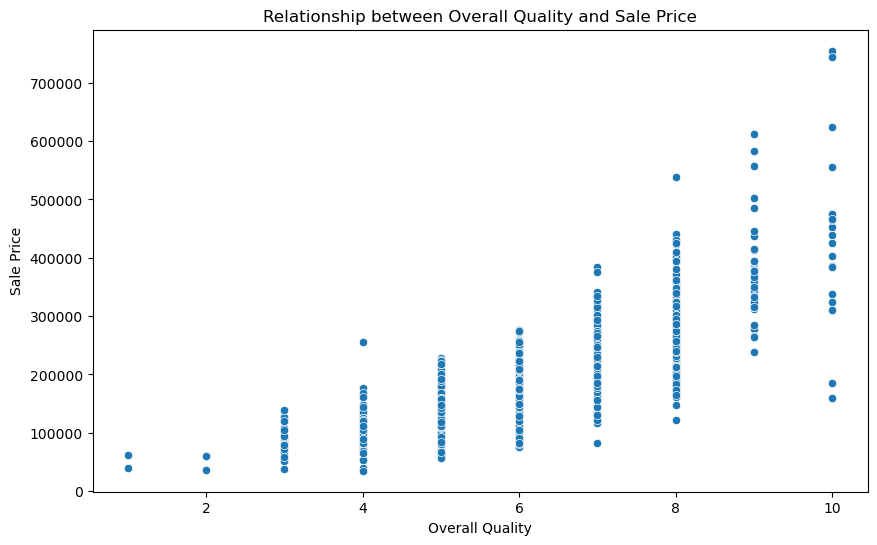

In [40]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Extract OverallQual and SalePrice columns
overall_qual = df['OverallQual']
sale_price = df['SalePrice']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(overall_qual, sale_price)

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=overall_qual, y=sale_price)
plt.title('Relationship between Overall Quality and Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


The Pearson correlation coefficient between house overall quality (OverallQual) and its sale price is approximately 0.791, and the p-value is significantly low (p-value: 2.185675268e-313). This indicates a strong positive correlation between overall quality and sale price. In other words, as the overall quality of a house increases, its sale price tends to increase as well. The p-value being very close to zero suggests that this correlation is statistically significant, providing evidence to reject the null hypothesis that there is no correlation. Therefore, based on the data, we have reason to believe that there is indeed a significant positive correlation between overall quality and sale price.

#### 4.1.6 Is there a significant difference in sale prices based on different zoning classifications (MSZoning)?

Zoning classifications (MSZoning) might play a role in housing prices. Our hypotheses explore potential differences in sale prices based on zoning categories.

In [42]:
from scipy.stats import f_oneway

# Example: Assuming 'MSZoning' is a categorical variable and 'SalePrice' is numeric
zones = df['MSZoning'].unique()

# Create a list of dataframes for each zone
zone_dfs = [df[df['MSZoning'] == zone]['SalePrice'] for zone in zones]

# Perform ANOVA
f_stat, p_value = f_oneway(*zone_dfs)

# Print results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in sale prices based on different zoning classifications.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sale prices among different zoning classifications.")


F-statistic: 43.84028167245718
P-value: 8.817633866272648e-35
Reject the null hypothesis. There is a significant difference in sale prices based on different zoning classifications.


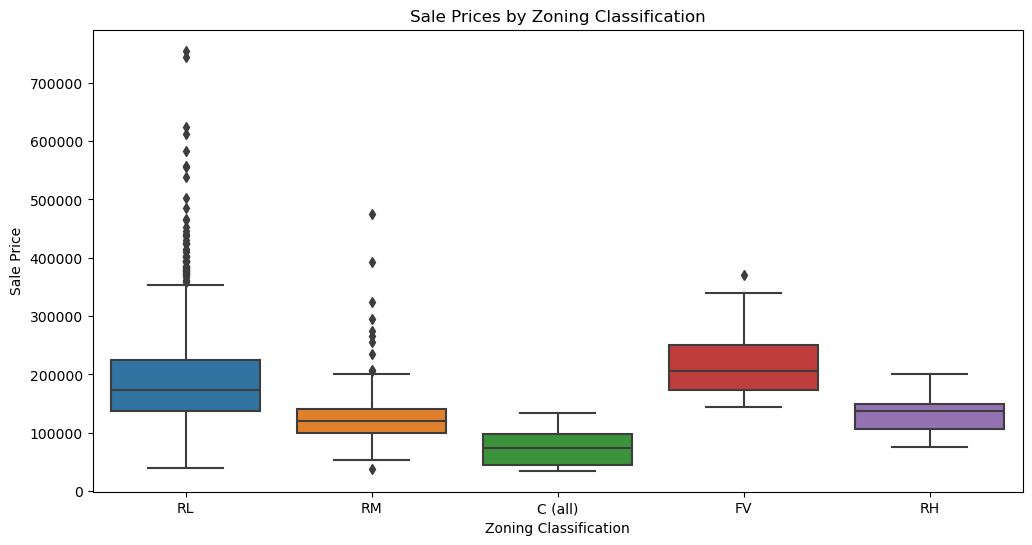

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming 'MSZoning' is a categorical variable and 'SalePrice' is numeric
plt.figure(figsize=(12, 6))

# Create a boxplot
sns.boxplot(x='MSZoning', y='SalePrice', data=df)

# Set plot title and labels
plt.title('Sale Prices by Zoning Classification')
plt.xlabel('Zoning Classification')
plt.ylabel('Sale Price')

# Show the plot
plt.show()


#### 4.1.7 Is there a significant difference in sale prices based on different sale types (SaleType)?

The availability of utilities (Utilities) and the type of sale (SaleType) are socio-political factors that could influence sale prices. Hypotheses are designed to detect significant variations in prices based on these factors.

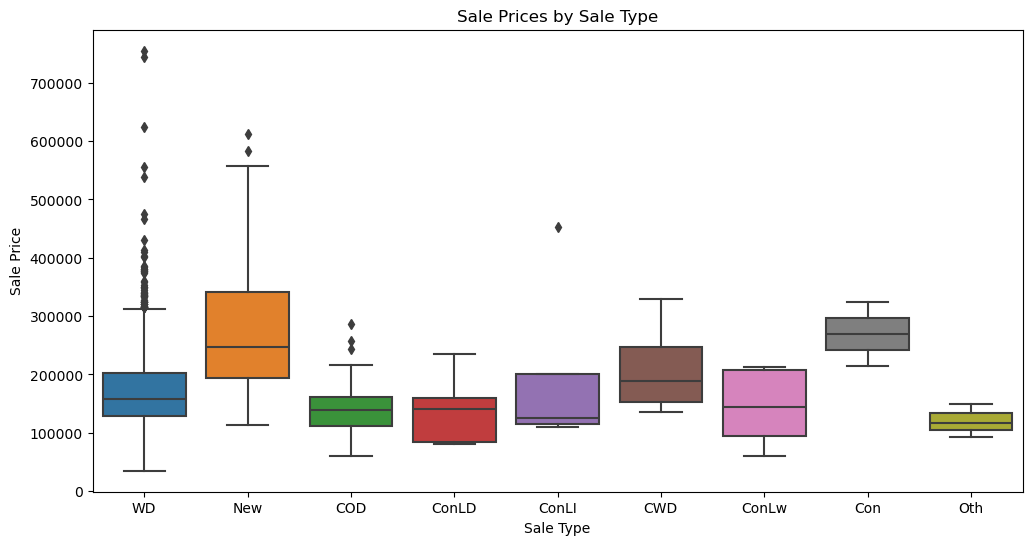

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'SaleType' is a categorical variable and 'SalePrice' is numeric
plt.figure(figsize=(12, 6))

# Create a boxplot
sns.boxplot(x='SaleType', y='SalePrice', data=df)

# Set plot title and labels
plt.title('Sale Prices by Sale Type')
plt.xlabel('Sale Type')
plt.ylabel('Sale Price')

# Show the plot
plt.show()


#### 4.1.8 Is there a significant difference in sale prices based on different sale conditions (SaleCondition)?

Lastly, we scrutinize different sale conditions (SaleCondition) to understand their impact on housing prices.

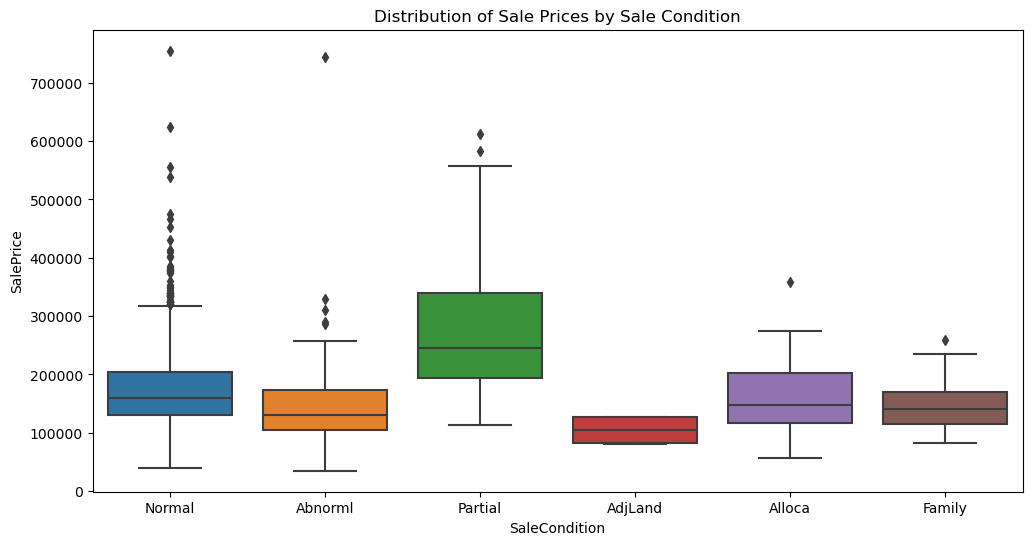

ANOVA p-value: 7.988268404991176e-44
There is a significant difference in sale prices based on different sale conditions.


In [47]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant data
sale_condition_groups = df.groupby('SaleCondition')['SalePrice'].apply(list)

# Perform ANOVA
anova_result = stats.f_oneway(*sale_condition_groups)

# Visualize the data distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df)
plt.title('Distribution of Sale Prices by Sale Condition')
plt.show()

# Print ANOVA results
print("ANOVA p-value:", anova_result.pvalue)

# Determine significance
alpha = 0.05
if anova_result.pvalue < alpha:
    print("There is a significant difference in sale prices based on different sale conditions.")
else:
    print("There is no significant difference in sale prices based on different sale conditions.")


## 5. Conclusion

In [49]:
import pandas as pd
import scipy.stats as stats

# Define the variables for analysis
categorical_variables = ['Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'MSZoning', 'SaleType', 'SaleCondition']
numeric_variables = ['YearBuilt', 'YearRemodAdd', 'OverallQual']

# Create an empty list to store DataFrames
results_frames = []

# Function to perform ANOVA and return results as a DataFrame
def perform_anova(variable, df):
    groups = df.groupby(variable)['SalePrice'].apply(list)
    anova_result = stats.f_oneway(*groups)
    hypothesis_rejected = 'Yes' if anova_result.pvalue < 0.05 else 'No'
    interpretation = 'Significant' if hypothesis_rejected == 'Yes' else 'Not Significant'
    
    return pd.DataFrame({
        'Questions': [f"Diff. in sale prices based on {variable}? ({anova_result.pvalue:.2e})"],
        'Hypotheses Testing': ['ANOVA'],
        'Results': [f"P-value: {anova_result.pvalue:.2e}"],
        'Hypothesis Rejected': [hypothesis_rejected],
        'Interpretation': [interpretation]
    })

# Questions and Hypotheses Testing for Categorical Variables
for variable in categorical_variables:
    results_frames.append(perform_anova(variable, df))

# Function to perform Pearson correlation and return results as a DataFrame
def perform_pearson_correlation(variable, target_variable, df):
    correlation, p_value = stats.pearsonr(df[variable], df[target_variable])
    hypothesis_rejected = 'Yes' if p_value < 0.05 else 'No'
    interpretation = 'Significant' if hypothesis_rejected == 'Yes' else 'Not Significant'
    
    return pd.DataFrame({
        'Questions': [f"Correlation between {variable} and sale price? ({p_value:.2e})"],
        'Hypotheses Testing': ['Pearson Correlation'],
        'Results': [f"Pearson: {correlation:.2f}, P-value: {p_value:.2e}"],
        'Hypothesis Rejected': [hypothesis_rejected],
        'Interpretation': [interpretation]
    })

# Questions and Hypotheses Testing for Numeric Variables
for variable in numeric_variables:
    results_frames.append(perform_pearson_correlation(variable, 'SalePrice', df))

# Concatenate the results DataFrames into a single DataFrame
analysis_results = pd.concat(results_frames, ignore_index=True)

# Display the analysis results
print(analysis_results)


                                           Questions   Hypotheses Testing  \
0  Diff. in sale prices based on Neighborhood? (1...                ANOVA   
1  Diff. in sale prices based on Condition1? (8.9...                ANOVA   
2  Diff. in sale prices based on Condition2? (4.3...                ANOVA   
3  Diff. in sale prices based on Utilities? (5.85...                ANOVA   
4  Diff. in sale prices based on MSZoning? (8.82e...                ANOVA   
5  Diff. in sale prices based on SaleType? (5.04e...                ANOVA   
6  Diff. in sale prices based on SaleCondition? (...                ANOVA   
7  Correlation between YearBuilt and sale price? ...  Pearson Correlation   
8  Correlation between YearRemodAdd and sale pric...  Pearson Correlation   
9  Correlation between OverallQual and sale price...  Pearson Correlation   

                             Results Hypothesis Rejected   Interpretation  
0                 P-value: 1.56e-225                 Yes      Significant  


The results of the analysis provide valuable insights for policy considerations in the real estate dynamics of Ames, Iowa. The significant differences in sale prices based on neighborhood, conditions, zoning classifications, sale types, and sale conditions highlight the need for targeted policies that address the unique characteristics of each area. This could involve neighborhood-specific initiatives, condition-based incentives, or zoning regulations tailored to local demands. Additionally, recognizing the impact of factors like the year a house was built, remodeled, and overall quality on sale prices can guide policymakers in developing strategies to promote sustainable and equitable housing development. The findings contribute to a comprehensive understanding of the socio-political implications of real estate dynamics, informing potential policy interventions for enhancing the housing market in Ames